In [ ]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller

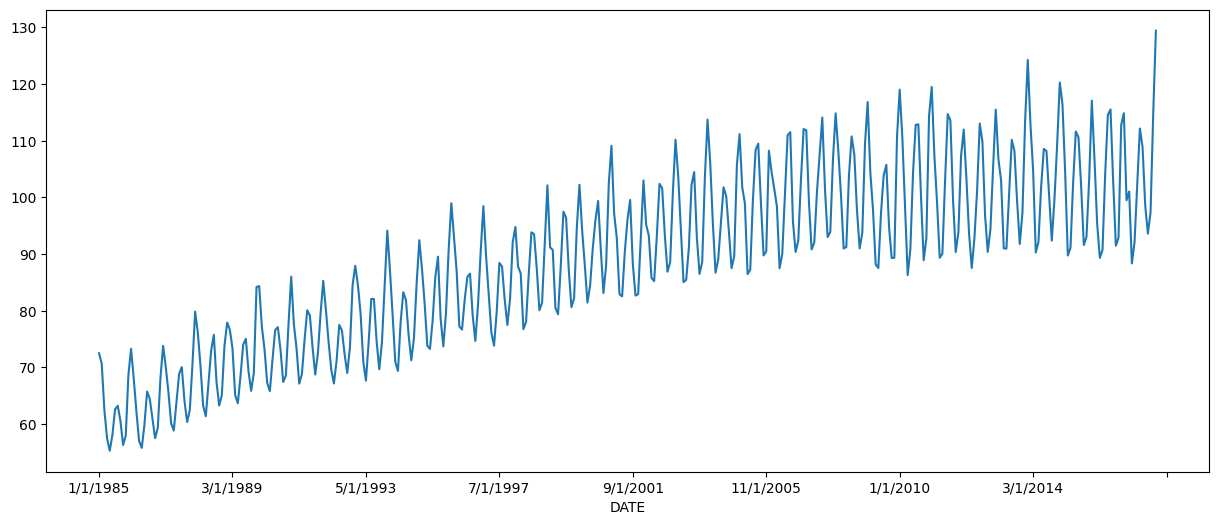

Results of Dickey-Fuller Test for column: value
Test Statistic                  -2.256990
p-value                          0.186215
No Lags Used                    15.000000
Number of Observations Used    381.000000
Critical Value (1%)             -3.447631
Critical Value (5%)             -2.869156
Critical Value (10%)            -2.570827
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
  print (f'Results of Dickey-Fuller Test for column: {column_name}')
  dftest = adfuller(series, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)
  if dftest[1] <= 0.05:
    print("Conclusion:====>")
    print("Reject the null hypothesis")
    print("Data is stationary")
  else:
    print("Conclusion:====>")
    print("Fail to reject the null hypothesis")
    print("Data is non-stationary")

series = pd.read_csv(r'/content/Electric_production.csv', header=0, index_col=0)

series['IPG2211A2N'].plot(figsize=(15, 6))
pyplot.show()

Augmented_Dickey_Fuller_Test_func(series['IPG2211A2N'], 'value')


In [ ]:
Augmented_Dickey_Fuller_Test_func(series['IPG2211A2N'].diff().dropna(),'value')

Results of Dickey-Fuller Test for column: value
Test Statistic                -7.104891e+00
p-value                        4.077787e-10
No Lags Used                   1.400000e+01
Number of Observations Used    3.810000e+02
Critical Value (1%)           -3.447631e+00
Critical Value (5%)           -2.869156e+00
Critical Value (10%)          -2.570827e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


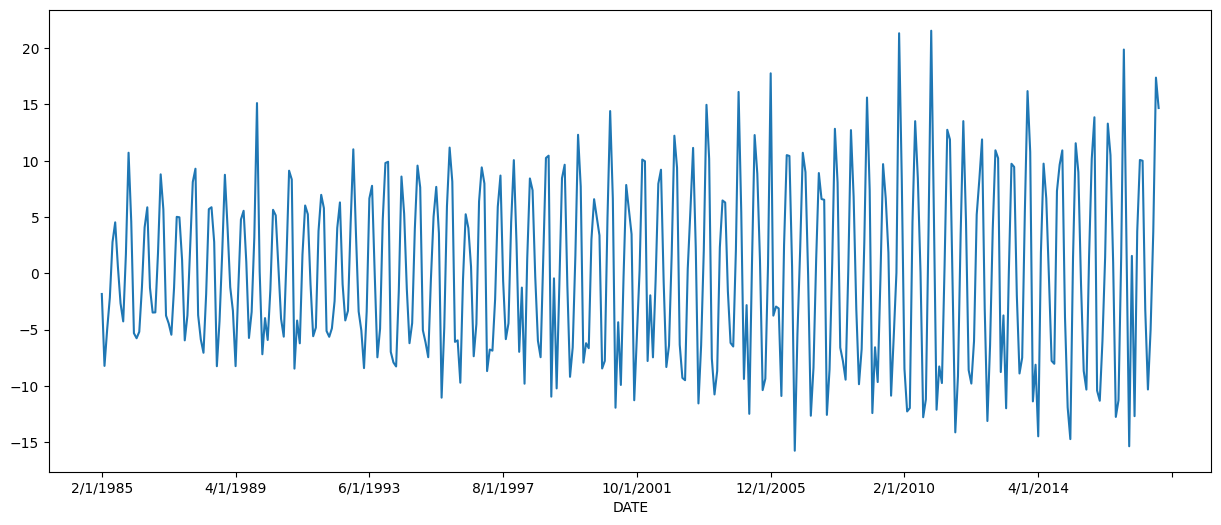

In [ ]:
series['IPG2211A2N'].diff().dropna().plot(figsize=(15,6))
pyplot.show()